
**QUESTIONS**

5º - Create a model to predict property price.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

In [2]:
# import data set
df = pd.read_csv('C:/Users/zanin/OneDrive/Área de Trabalho/airbnbrj/listingsrj.csv')
df_cal = pd.read_csv('C:/Users/zanin/OneDrive/Área de Trabalho/airbnbrj/calendar.csv')

# Identify the numer of rows and columns in the dataset

for data in [df, df_cal]:
    print(data.shape)


(26366, 75)
(9623164, 7)


In [3]:
# Explore the data set and identify data type
for data in [df, df_cal]:
    display(data.head(3))

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,53344884,https://www.airbnb.com/rooms/53344884,20220921172238,2022-09-22,city scrape,Suntuoso apartamento em Copacabana posto 6,suntuoso apartamento de frente para o mar <br ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,431412286,...,NaN,NaN,NaN,NaN,t,10,8,2,0,NaN
1,7801456,https://www.airbnb.com/rooms/7801456,20220921172238,2022-09-22,city scrape,Ipanema Vieira Souto - Linda Vista,Flat luxuoso com a melhor localização do Rio d...,"Ipanema é considerado o berço do rio, cheio de...",https://a0.muscache.com/pictures/99276394/dc9c...,40650139,...,NaN,NaN,NaN,NaN,t,5,5,0,0,NaN
2,14333905,https://www.airbnb.com/rooms/14333905,20220921172238,2022-09-22,city scrape,Casa compartilhada,"A 15 min. do complexo esportivo de Deodoro, Ca...",NaN,https://a0.muscache.com/pictures/15235501-16c4...,87749071,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,53344884,2022-09-22,t,"$3,500.00","$3,500.00",3.0,365.0
1,53344884,2022-09-23,t,"$3,500.00","$3,500.00",3.0,365.0
2,53344884,2022-09-24,t,"$3,500.00","$3,500.00",3.0,365.0


In [4]:
# check for each column's datatype and the number of non-null values in the dataset.
# this helps to understand features better and their contribuition for data analysis.
pd.options.display.max_rows = 75
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26366 entries, 0 to 26365
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26366 non-null  int64  
 1   listing_url                                   26366 non-null  object 
 2   scrape_id                                     26366 non-null  int64  
 3   last_scraped                                  26366 non-null  object 
 4   source                                        26366 non-null  object 
 5   name                                          26347 non-null  object 
 6   description                                   25539 non-null  object 
 7   neighborhood_overview                         13895 non-null  object 
 8   picture_url                                   26366 non-null  object 
 9   host_id                                       26366 non-null 

In [5]:
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9623164 entries, 0 to 9623163
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 513.9+ MB


In [6]:
# columns with all value as NaN(null) is useless to our analysis and can't be filled with any reference value in the column.
# Removing the columns which has all values NaN(null).
df.dropna(axis=1, how='all', inplace=True)
df.shape

(26366, 71)

Variables of interest: Price or Price per accomodation?



In [7]:
# remove money ($) sign and convert to float
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['price'].fillna(df['price'].median(), inplace = True)


In [8]:
# removing outliers in price to better analize and visualize the data.
cols = ['price'] 

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

<AxesSubplot: xlabel='price'>

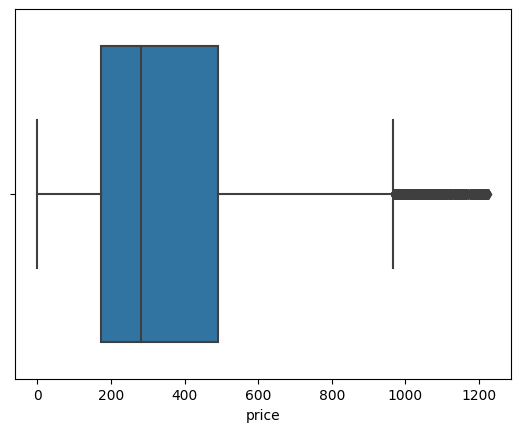

In [9]:
#showing the outliers
sns.boxplot(data=df, x='price')

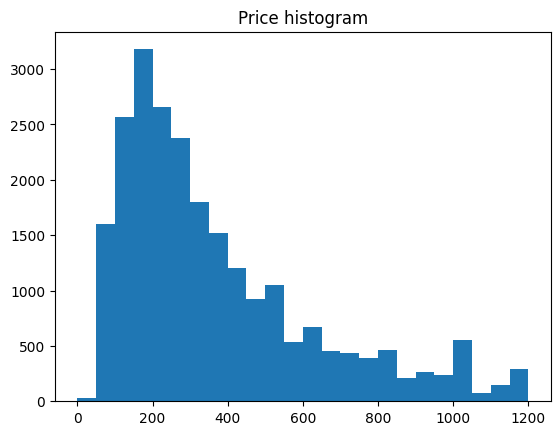

In [10]:
# price histogram 

#sns.histplot(df['price'], kde=True)
bins = np.arange(0, df['price'].max(),50)
plt.hist(data= df, x='price', bins=bins)
plt.title('Price histogram')
plt.show()

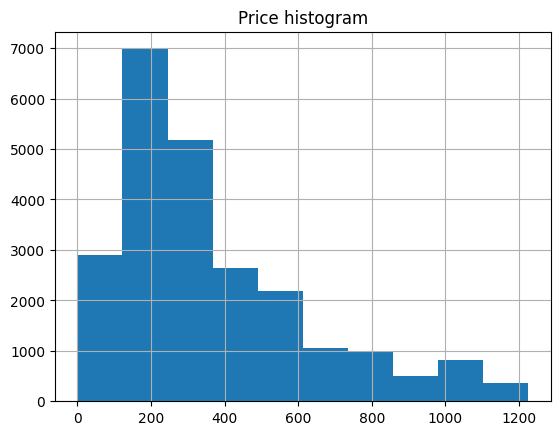

In [11]:
df['price'].hist()
plt.title('Price histogram')
plt.show()

In [12]:
# create the variable price oer accomodate
df['ppa'] = df['price']/df['accommodates']

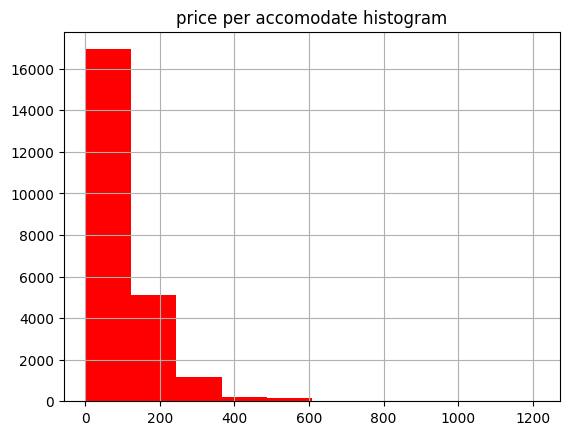

In [13]:
df['ppa'].hist(color='red')
plt.title('price per accomodate histogram')
plt.show()

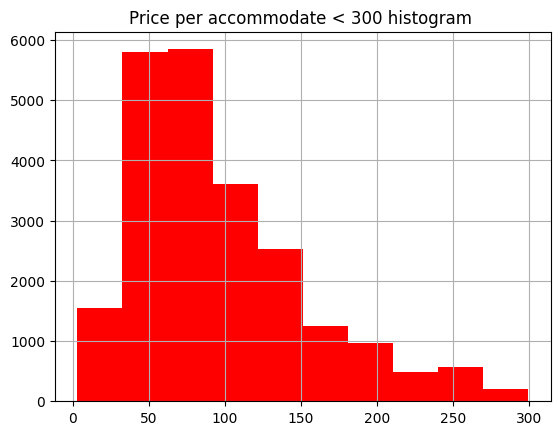

In [14]:
# price per accommodate histogram, considering only values under 300
df[df['ppa']<300]['ppa'].hist(color='red')
plt.title('Price per accommodate < 300 histogram ')
plt.show()

**Data Preparation - Listing dataset (df)**

In order to analyse the property size, we need to consider the property type, room type and badrooms features from data set.

We will further explore the above said feature and create a new dataframe.



In [15]:
# Fill NaN values with ffill/bfill since it is an object type and can't be interpreted with numerical methods to ffilna

df['host_response_rate'].fillna(method='backfill', inplace=True)
df['host_acceptance_rate'].fillna(method='backfill', inplace=True)
df['host_response_time'].fillna(method='backfill', inplace=True)

# Remove %sign and conver the data type to int

df['host_response_rate'] = (df['host_response_rate'].str[:-1].astype(int))
df['host_acceptance_rate'] = (df['host_acceptance_rate'].str[:-1].astype(int))

In [16]:
# Accordanly with summary of df, bathrooms was deleted because had all values NaN(null), but the correct information was placed in bethrooms_text that was 'object' type,
# for that we will rename the column bethrooms_text to bethrooms to better visualization, and than converte only the numbers to float

df.rename(columns={'bathrooms_text' : 'bathrooms'}, inplace=True)
df['bathrooms'] = df['bathrooms'].str.extract('(\d+)').astype(float)

df.bathrooms.head(3)

2    1.0
4    1.0
5    1.0
Name: bathrooms, dtype: float64

In [17]:
# drop na rows in bathrooms, bedrooms and beds since they have differente numbers of rows with NaN(null) values
df.dropna(axis=0, subset=['bathrooms', 'bedrooms', 'beds'], inplace=True)

# Creating a new dataframe with bathrooms, bedrooms and beds.
df_rooms = df[['bathrooms', 'bedrooms', 'beds']]

# Converting the data type from string to integer
for room in df_rooms:
    df_rooms[room].astype(int)

#Assigning the converted values from df_rooms to the df_list dataframe
df[['bathrooms', 'bedrooms', 'beds']] = df_rooms[['bathrooms', 'bedrooms', 'beds']]


In [18]:

# Lets fill na with median values for reviews columns
#The review data distribution above show that the data is highly skewed to left
#To avoid bias in result due to skewness we chose mean to fill na instead of other methods 
for feature in ["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", 
                "review_scores_checkin", "review_scores_communication", "review_scores_location", 
                "review_scores_value", "reviews_per_month"]:
    df[feature].fillna(df[feature].mean(), inplace = True)


**Numerical Features**

In [19]:
# select the numerical features 
df_int = df.select_dtypes(include=['float64', 'int64', 'int32'])

# add categorical columns to df_int 
df_int[['superhost', 'room_type', 'neighbourhood_cleansed', 'property_type', 'host_response_time']] = df[['host_is_superhost', 'room_type', 'neighbourhood_cleansed', 'property_type', 'host_response_time']]

#drop the columns which has large number of null values, which will be a hinder while applying prediction algorithms
df_int.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 22153 entries, 2 to 26365
Data columns (total 47 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            22153 non-null  int64  
 1   scrape_id                                     22153 non-null  int64  
 2   host_id                                       22153 non-null  int64  
 3   host_response_rate                            22153 non-null  int32  
 4   host_acceptance_rate                          22153 non-null  int32  
 5   host_listings_count                           22151 non-null  float64
 6   host_total_listings_count                     22151 non-null  float64
 7   latitude                                      22153 non-null  float64
 8   longitude                                     22153 non-null  float64
 9   accommodates                                  22153 non-null 

In [20]:
#Handle Categorical Variable

cleanup_nums = {'superhost': {'t':1, 'f': 2},
'room_type': {'Entire home/apt': 1, 'private room': 2, 'shared room': 3}}
df_int_copy = df_int
df_int_copy = df_int_copy.replace(cleanup_nums)

#neighbourhood_cleansed, property_type, host_response_time 
df_int_dummies = pd.get_dummies(df_int_copy)


In [21]:
df_int_dummies.dropna(axis=1, how='any', inplace=True)

**Model to try out to predict princing**

MAE from RandomForestRegressor(random_state=0):1.070707192296117
MAE from LinearRegression():152.24803274497754


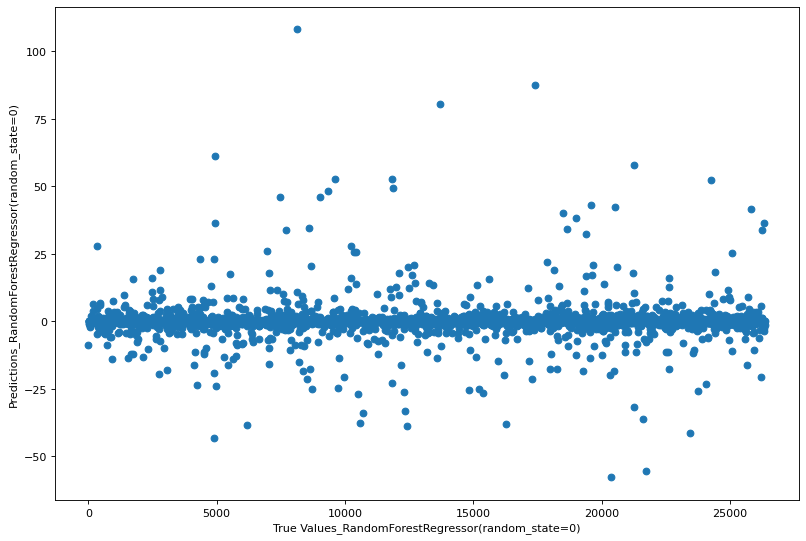

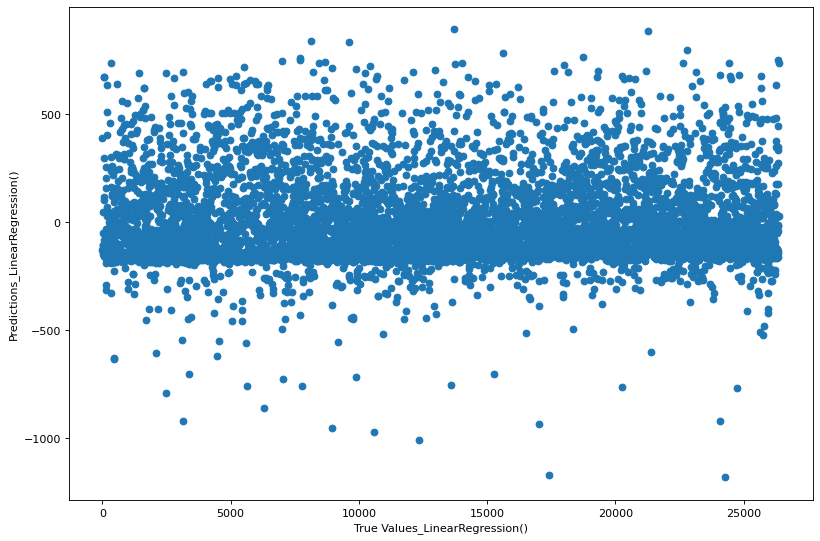

In [22]:
#Assign target y variable and features X variable
y = df_int_dummies.price

X = df_int_dummies.drop(labels = ["price"], axis = 1)

#split test and train dataset from X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


#We will create a function to fit the model and evaluate
def model_evaluate(model, x_train, y_train, x_test, y_test):
    '''Input:
    model : define prediction algorithm that we want to apply
    x_train : training dataset with input features
    y_test: training data series for target variable
    x_test: validation dataset with input features
    y_test: validation data series for target variable
    
    1.) fit the model to training data set
    2.) predict the target variable for the validation data set
    3.) compare and evaluate the predicted target variable and actual target variable for the validation data set
    
    Output:
    1.) Mean absolute error for each model applied
    2.) scatter plot for the difference between actual and predicted target variable of the validation data set
    '''
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, pred)
    print("MAE from {0}:{1}".format(model, mae))
    fig = plt.figure(figsize=(12, 8), dpi=80)
    ax1 = fig.add_subplot(111)
    lines = plt.plot(y_test - pred,marker='o',linestyle='')
    ax1.set_xlabel('True Values_{}'.format(model))
    ax1.set_ylabel('Predictions_{}'.format(model))

#Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=0)    
model_evaluate(model_rf, X_train, y_train, X_test, y_test)

#Linear Regression
model_lr = LinearRegression()
model_evaluate(model_lr, X_train, y_train, X_test, y_test)

Random forest Regressor has a MAE of 1.07 comparing to Linear Regression MAE value 152.24, which helps us to understand that Random forest model is performing way better than Linear Regression.